In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
white = pd.read_csv('winequality-white.csv')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C59B9A278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022C5A0F13C8>]], dtype=object)

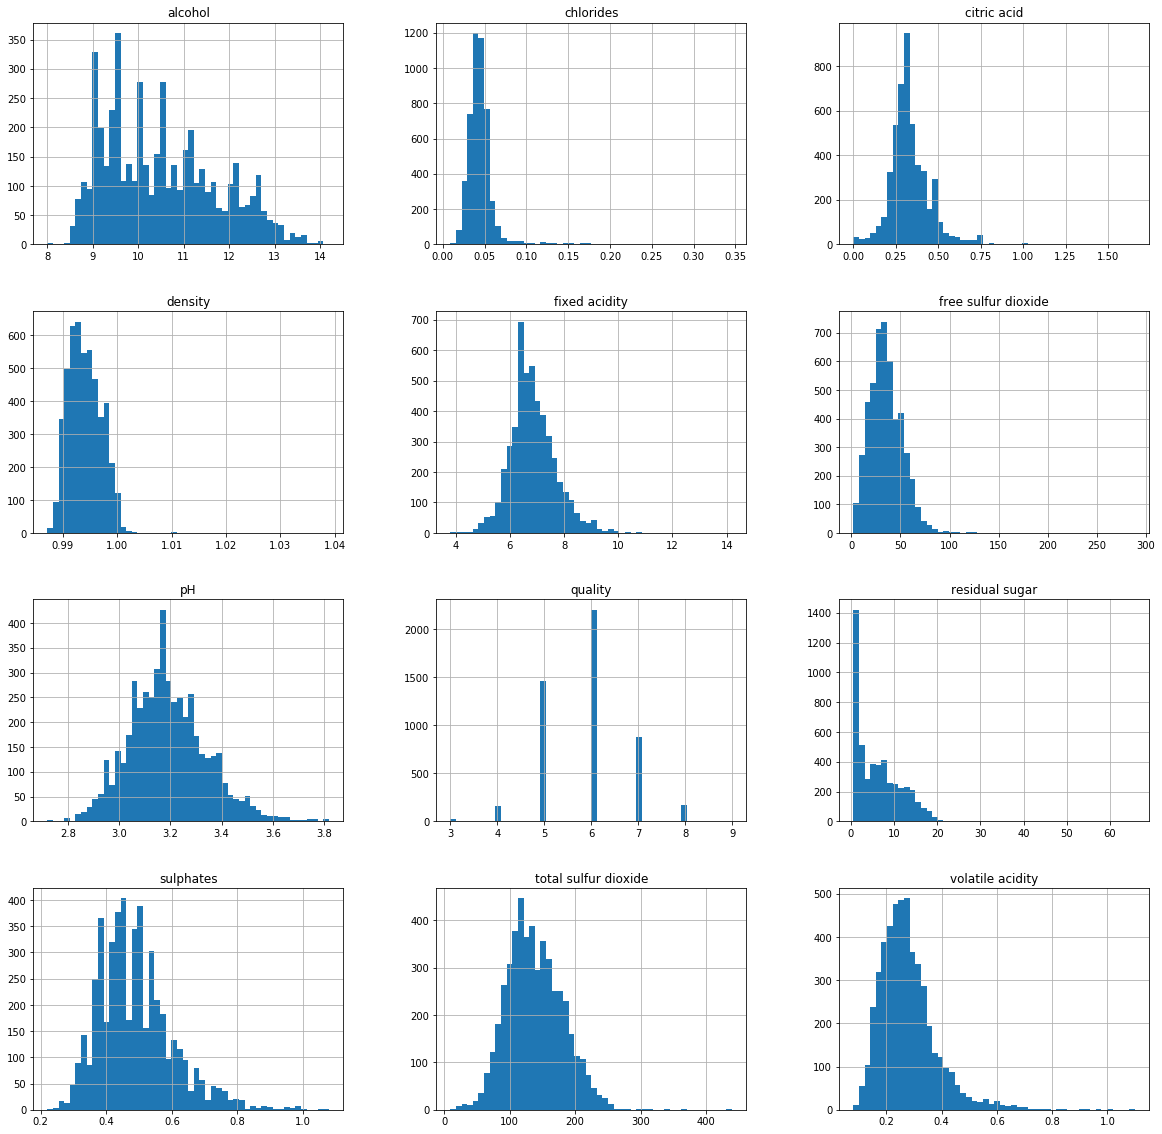

In [14]:
white.hist(bins=50, figsize=(20,20))

In [11]:
red = pd.read_csv('winequality-red.csv')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

In [19]:
pls_w = PLSRegression(scale = False)
scores0 = cross_val_score(pls_w, white.iloc[:,:-1], white.iloc[:,-1], cv=5, scoring = 'neg_mean_absolute_error')
scores0

array([-0.71892932, -0.69799766, -0.67869504, -0.65139362, -0.55176615])

In [25]:
pls_w = PLSRegression()
scores1 = cross_val_score(pls_w, white.iloc[:,:-1], white.iloc[:,-1], cv=5, scoring = 'neg_mean_absolute_error')
scores1

array([-0.65388759, -0.6163049 , -0.60088656, -0.59391965, -0.54922289])

In [26]:
scores0.mean()

-0.65975635707539537

In [27]:
scores1.mean()

-0.60284431780022429

In [28]:
white.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [30]:
white.max()

fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
quality                   9.00000
dtype: float64

In [36]:
from scipy.stats import norm

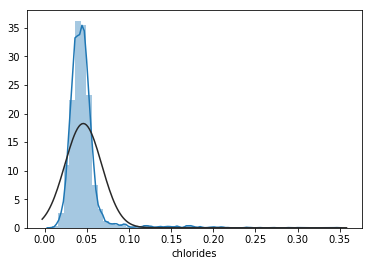

In [37]:
sns.distplot(white['chlorides'], fit=norm);

In [38]:
test = np.log(white['chlorides'])

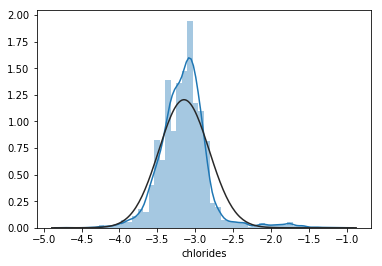

In [39]:
sns.distplot(test, fit=norm);

In [40]:
white['chlorides'].skew()

5.0233306827597071

In [41]:
test.skew()

1.1341336461195819

In [44]:
white.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler

In [49]:
saleprice_scaled = StandardScaler().fit_transform(white['chlorides'].reshape(-1,1));
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-100:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.68327372]
 [-1.54594716]
 [-1.50017164]
 [-1.45439612]
 [-1.45439612]
 [-1.45439612]
 [-1.45439612]
 [-1.4086206 ]
 [-1.4086206 ]
 [-1.4086206 ]]

outer range (high) of the distribution:
[[  3.16893139]
 [  3.26048243]
 [  3.26048243]
 [  3.26048243]
 [  3.30625795]
 [  3.35203347]
 [  3.35203347]
 [  3.35203347]
 [  3.39780899]
 [  3.44358451]
 [  3.44358451]
 [  3.48936003]
 [  3.53513555]
 [  3.53513555]
 [  3.53513555]
 [  3.53513555]
 [  3.67246211]
 [  3.67246211]
 [  3.67246211]
 [  3.71823763]
 [  3.71823763]
 [  3.85556419]
 [  3.94711523]
 [  3.99289075]
 [  4.08444179]
 [  4.13021731]
 [  4.17599283]
 [  4.17599283]
 [  4.22176835]
 [  4.22176835]
 [  4.40487043]
 [  4.40487043]
 [  4.40487043]
 [  4.49642147]
 [  4.54219699]
 [  4.58797251]
 [  4.63374803]
 [  4.63374803]
 [  4.67952355]
 [  4.72529907]
 [  4.77107459]
 [  4.86262563]
 [  4.86262563]
 [  4.95417667]
 [  5.04572771]
 [  5.09150323]
 [  5.09150323]
 [  5.09150323]
 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [53]:
nooutliers = saleprice_scaled[saleprice_scaled < 3]

In [56]:
nooutliers1 = pd.DataFrame(data=nooutliers)

In [57]:
nooutliers1.skew()

0    1.04894
dtype: float64

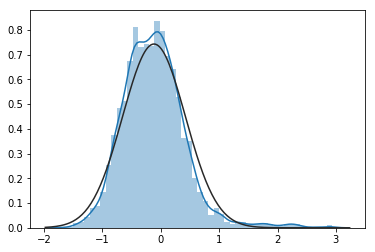

In [58]:
sns.distplot(nooutliers1, fit=norm);

In [60]:
nooutliers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 1 columns):
0    4796 non-null float64
dtypes: float64(1)
memory usage: 37.5 KB


In [61]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [214]:
df = white.copy()

In [70]:
df_scaled = StandardScaler().fit(df.iloc[:,:-1])

In [79]:
saleprice_scaled = StandardScaler().fit_transform(white['volatile acidity'].reshape(-1,1));
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-100:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.96698494]
 [-1.96698494]
 [-1.96698494]
 [-1.96698494]
 [-1.91737402]
 [-1.8677631 ]
 [-1.76854125]
 [-1.76854125]
 [-1.76854125]
 [-1.76854125]]

outer range (high) of the distribution:
[[ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.79566358]
 [ 2.89488543]
 [ 2.89488543]
 [ 2.89488543]
 [ 2.89488543]
 [ 2.99410727]
 [ 2.99410727]
 [ 2.99410727]
 [ 2.99410727]
 [ 2.99410727]
 [ 2.99410727]
 [ 2.99410727]
 [ 3.04371819]
 [ 3.04371819]
 [ 3.09332911]
 [ 3.09332911]
 [ 3.09332911]
 [ 3.09332911]
 [ 3.14294004]
 [ 3.14294004]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.19255096]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.2917728 ]
 [ 3.34138372]
 [ 3.34138372]
 [ 3.34138372]
 [ 3.34138372]
 [ 3.39099465]
 [ 3.39099465]
 [ 3.39099465]
 [ 3.39099465]
 [ 3.39099465]
 [ 3.49021649]
 [ 3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [87]:
nooutlier0 = saleprice_scaled[saleprice_scaled < 3]

In [81]:
nooutlier0 = pd.DataFrame(nooutlier0)

In [88]:
low_range = nooutlier0[nooutlier0[:,0].argsort()][:10]
high_range= nooutlier0[nooutlier0[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

IndexError: too many indices for array

In [90]:
len(nooutlier0)

4817

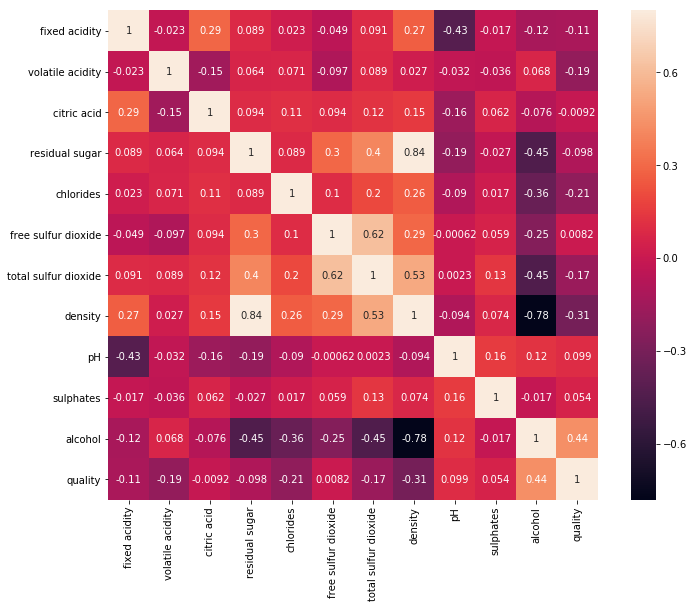

In [94]:
corrmat = white.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [99]:
df = StandardScaler().fit_transform(white.iloc[:,:-1])

In [215]:
for i in df:
    if i == 'quality':
        break
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(-1,1))

In [173]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


In [119]:
for i in df.iloc[0,:-1]:
    print(i)

0.172096961
-0.0817699008083
0.213280201791
2.82134916946
-0.0353550003591
0.56993157686
0.744565034621
2.33151201465
-1.24692128107
-0.349184257308
-1.39315245993


In [170]:
len(df)

4882

In [126]:
for i in range(len(df)):
    if i == 0:
        print('yes')
    if i == 4898:
        print('no')

yes


In [127]:
len(white)

4898

In [216]:
droplist =[]

In [217]:
for i in range(len(df)):
    for j in df.iloc[i,:-1]:
        if j >= 3 or j <= -3:
            print(df.loc[i])
            droplist.append(i)

fixed acidity          -0.776015
volatile acidity        3.787882
citric acid             1.204955
residual sugar         -1.023637
chlorides              -0.767763
free sulfur dioxide    -0.370946
total sulfur dioxide   -1.491059
density                -1.614182
pH                      0.938724
sulphates              -0.874973
alcohol                 1.857572
quality                 8.000000
Name: 17, dtype: float64
fixed acidity          -0.776015
volatile acidity        3.787882
citric acid             1.204955
residual sugar         -1.023637
chlorides              -0.767763
free sulfur dioxide    -0.370946
total sulfur dioxide   -1.491059
density                -1.614182
pH                      0.938724
sulphates              -0.874973
alcohol                 1.857572
quality                 8.000000
Name: 20, dtype: float64
fixed acidity           0.883181
volatile acidity        3.887104
citric acid            -1.604790
residual sugar         -0.964483
chlorides               1.

Name: 315, dtype: float64
fixed acidity           0.764667
volatile acidity       -0.081770
citric acid            -0.199917
residual sugar         -0.116614
chlorides               0.513951
free sulfur dioxide     5.627148
total sulfur dioxide    4.109768
density                 0.191474
pH                     -0.054751
sulphates               0.877657
alcohol                -0.011595
quality                 5.000000
Name: 325, dtype: float64
fixed acidity           0.764667
volatile acidity       -0.081770
citric acid            -0.199917
residual sugar         -0.116614
chlorides               0.513951
free sulfur dioxide     5.627148
total sulfur dioxide    4.109768
density                 0.191474
pH                     -0.054751
sulphates               0.877657
alcohol                -0.011595
quality                 5.000000
Name: 325, dtype: float64
fixed acidity          -0.301959
volatile acidity       -0.974766
citric acid             0.130641
residual sugar         -0.96448

Name: 1016, dtype: float64
fixed acidity          -0.064931
volatile acidity        0.612783
citric acid             3.353583
residual sugar         -0.708151
chlorides               1.932992
free sulfur dioxide    -0.723775
total sulfur dioxide    1.097558
density                -0.410411
pH                      2.130894
sulphates               1.841604
alcohol                 1.207427
quality                 6.000000
Name: 1024, dtype: float64
fixed acidity          -0.657501
volatile acidity        3.192551
citric acid             0.874397
residual sugar          0.908715
chlorides               0.193523
free sulfur dioxide     0.863956
total sulfur dioxide    2.509531
density                 1.060865
pH                      0.011480
sulphates               0.702394
alcohol                -0.986812
quality                 4.000000
Name: 1029, dtype: float64
fixed acidity           1.238723
volatile acidity        3.589438
citric acid             1.039676
residual sugar          0.82

fixed acidity          -0.301959
volatile acidity        0.215896
citric acid             3.353583
residual sugar         -0.353229
chlorides              -0.218457
free sulfur dioxide     0.040688
total sulfur dioxide    0.485703
density                 0.191474
pH                      0.143944
sulphates              -0.349184
alcohol                -0.499203
quality                 5.000000
Name: 1570, dtype: float64
fixed acidity          -0.064931
volatile acidity       -1.073988
citric acid             3.353583
residual sugar         -0.787022
chlorides               0.330849
free sulfur dioxide     1.510809
total sulfur dioxide    1.026960
density                 0.425541
pH                      2.925674
sulphates               2.367393
alcohol                -0.011595
quality                 6.000000
Name: 1575, dtype: float64
fixed acidity           0.290611
volatile acidity        3.589438
citric acid             1.287594
residual sugar         -0.905330
chlorides             

In [284]:
len(droplist)

450

In [285]:
len(np.unique(droplist))

396

In [306]:
outliers = pd.DataFrame(pd.Series(droplist).value_counts())

In [305]:
pd.Series(droplist).value_counts().value_counts()

1    346
2     47
3      2
4      1
dtype: int64

In [309]:
outliers = outliers[outliers[0] > 1]

In [326]:
for i in outliers[0]:
    if i == 3:
        print(i.name)

AttributeError: 'numpy.int64' object has no attribute 'name'

In [220]:
df.drop(np.unique(droplist), inplace=True)

In [221]:
df.skew()

fixed acidity           0.302459
volatile acidity        0.748206
citric acid             0.431076
residual sugar          0.707949
chlorides               1.050589
free sulfur dioxide     0.361900
total sulfur dioxide    0.270373
density                 0.260669
pH                      0.278086
sulphates               0.647401
alcohol                 0.443220
quality                 0.204812
dtype: float64

In [208]:
for i in df:
    if i == 'quality':
        break
    df[i] = np.log(df[i])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [179]:
white.max()

fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
quality                   9.00000
dtype: float64

In [201]:
df.max()

fixed acidity           2.897919
volatile acidity        2.994107
citric acid             2.940385
residual sugar          2.841067
chlorides               2.940054
free sulfur dioxide     2.980930
total sulfur dioxide    2.862525
density                 2.652518
pH                      2.991905
sulphates               2.980814
alcohol                 2.995326
quality                 9.000000
dtype: float64

In [181]:
len(df)

4504

ValueError: color kwarg must have one color per dataset

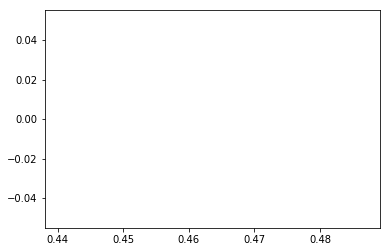

In [224]:
pls_w = PLSRegression(scale = False)
scores2 = cross_val_score(pls_w, df.iloc[:,:-1], df.iloc[:,-1], cv=5, scoring = 'neg_mean_absolute_error')
scores2.mean()

-0.59707279262127011

In [225]:
scores0.mean()

-0.65975635707539537

In [226]:
scores1.mean()

-0.60284431780022429

In [279]:
logdata = white.copy()

In [280]:
for i in logdata:
    if i == 'quality':
        break
    logdata[i] = np.log1p(logdata[i])

In [233]:
logdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.079442,0.239017,0.307485,3.077312,0.044017,3.828641,5.141664,0.693647,1.386294,0.371564,2.282382,6
1,1.987874,0.262364,0.292670,0.955511,0.047837,2.708050,4.890349,0.690143,1.458615,0.398776,2.351375,6
2,2.208274,0.246860,0.336472,2.066863,0.048790,3.433987,4.584967,0.690694,1.449269,0.364643,2.406945,6
3,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,6
4,2.104134,0.207014,0.277632,2.251292,0.056380,3.871201,5.231109,0.690945,1.432701,0.336472,2.388763,6


In [281]:
pls_w = PLSRegression(scale = False)
scores3 = cross_val_score(pls_w, logdata.iloc[:,:-1], logdata.iloc[:,-1], cv=5, scoring = 'neg_mean_absolute_error')
scores3.mean()

-0.65643798671197184

In [277]:
for i in logdata:
    if i == 'quality':
        break
    logdata[i] = StandardScaler().fit_transform(logdata[i].values.reshape(-1,1))

droplist1= []

for i in range(len(logdata)):
    for j in logdata.iloc[i,:-1]:
        if j >= 3 or j <= -3:
            droplist1.append(i)
            
print(len(droplist1))
print(len(np.unique(droplist1)))

467
398


In [262]:
logdata.drop(np.unique(droplist1), inplace=True)

In [247]:
logdata.max()

fixed acidity           2.971091
volatile acidity        2.982752
citric acid             2.944863
residual sugar          2.136731
chlorides               2.912654
free sulfur dioxide     2.917414
total sulfur dioxide    2.877355
density                 2.979796
pH                      2.997693
sulphates               2.945852
alcohol                 2.695434
quality                 9.000000
dtype: float64

In [283]:
pls_w = PLSRegression(scale = False)
scores4 = cross_val_score(pls_w, logdata.iloc[:,:-1], logdata.iloc[:,-1], cv=5, scoring = 'neg_mean_absolute_error')
scores4.mean()

-0.65343564846419577

In [272]:
for i in logdata:
    print(i)

fixed acidity
volatile acidity
residual sugar
chlorides
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [282]:
logdata.drop(['citric acid','free sulfur dioxide'], inplace=True, axis=1)

In [257]:
df.drop(['alcohol','total sulfur dioxide', 'residual sugar'], inplace=True, axis=1)

In [266]:
logdata.skew()

fixed acidity          0.078831
volatile acidity       0.581200
citric acid            0.372892
residual sugar        -0.037679
chlorides              0.921138
free sulfur dioxide   -0.600984
pH                     0.212478
sulphates              0.465055
alcohol                0.303660
quality                0.220441
dtype: float64

In [267]:
df.skew()

fixed acidity          0.302459
volatile acidity       0.748206
citric acid            0.431076
chlorides              1.050589
free sulfur dioxide    0.361900
density                0.260669
pH                     0.278086
sulphates              0.647401
quality                0.204812
dtype: float64